In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install tensorflow
!pip install keras

In [3]:
import numpy
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
import keras.optimizers
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [4]:
#Sprint 1
#loading the dataset
#splitting the dataset into train and test


(X_train,y_train),(X_test,y_test)=mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
#Sprint 1
#understanding the data

X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

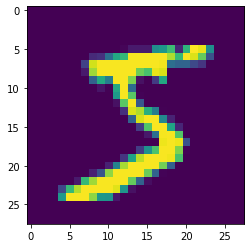

In [8]:
plt.imshow(X_train[0])

In [9]:
#Sprint 1
#reshaping the dataset
X_train=X_train.reshape(60000,28,28,1).astype('float32')
X_test=X_test.reshape(10000,28,28,1).astype('float32')

In [10]:
#Sprint 1
#one hot encoding
no_classes=10
y_train=np_utils.to_categorical(y_train,no_classes)
y_test=np_utils.to_categorical(y_test,no_classes)

In [11]:
#printing the new label
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
#Sprint 2
#Creating the model

model=Sequential()

#adding model layer
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))


#flatten the dimension of the image
model.add(Flatten())

#output layer with 10 neurons
model.add(Dense(no_classes,activation='softmax'))

In [13]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [14]:
#fitting the model

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.2006 - accuracy: 0.9523 - val_loss: 0.0885 - val_accuracy: 0.9723
Epoch 2/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0823 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0909 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0799 - val_accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0296 - accuracy: 0.9916 - val_loss: 0.0992 - val_accuracy: 0.9785


 Observing the metrics

In [15]:
#final evaluation of the model

metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss and Test Accuracy):")
print(metrics)

Metrics(Test loss and Test Accuracy):
[0.09918662905693054, 0.9785000085830688]


In [16]:
prediction=model.predict(X_test[:4])
print(prediction)

[[5.2894294e-15 2.5814291e-19 9.5410173e-11 1.6099146e-11 1.4468317e-17
  7.1942851e-20 5.2211987e-19 1.0000000e+00 6.8308337e-17 8.1811585e-14]
 [2.3133793e-10 1.1840976e-12 9.9999988e-01 5.6962590e-10 1.3074916e-18
  4.3224058e-18 6.4561910e-08 1.3946184e-18 4.5003153e-13 1.7983567e-20]
 [3.0728154e-06 9.9956661e-01 4.1231768e-05 3.0469952e-08 9.5305370e-07
  2.0185759e-07 9.3150682e-08 1.0494249e-07 3.8757292e-04 1.4367135e-10]
 [9.9999857e-01 3.6371961e-14 1.6705426e-10 1.6791923e-15 1.3762949e-16
  5.0370350e-12 1.4118601e-06 1.5589235e-14 4.5659206e-11 9.0290893e-11]]


In [17]:
print(numpy.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Observing the metrics

In [18]:
#final evaluation of the model

metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss and Test Accuracy):")
print(metrics)

Metrics(Test loss and Test Accuracy):
[0.09918662905693054, 0.9785000085830688]


In [19]:
prediction=model.predict(X_test[:4])
print(prediction)

[[5.2894294e-15 2.5814291e-19 9.5410173e-11 1.6099146e-11 1.4468317e-17
  7.1942851e-20 5.2211987e-19 1.0000000e+00 6.8308337e-17 8.1811585e-14]
 [2.3133793e-10 1.1840976e-12 9.9999988e-01 5.6962590e-10 1.3074916e-18
  4.3224058e-18 6.4561910e-08 1.3946184e-18 4.5003153e-13 1.7983567e-20]
 [3.0728154e-06 9.9956661e-01 4.1231768e-05 3.0469952e-08 9.5305370e-07
  2.0185759e-07 9.3150682e-08 1.0494249e-07 3.8757292e-04 1.4367135e-10]
 [9.9999857e-01 3.6371961e-14 1.6705426e-10 1.6791923e-15 1.3762949e-16
  5.0370350e-12 1.4118601e-06 1.5589235e-14 4.5659206e-11 9.0290893e-11]]


In [20]:
print(numpy.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
model.save('mnistCNN.h5')

In [22]:
!tar -zcvf image-classification-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [23]:
ls -1

image-classification-model_new.tgz
mnistCNN.h5


In [24]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 12.6 MB/s eta 0:00:01


In [25]:
from ibm_watson_machine_learning import APIClient

In [26]:
url_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":""
}
client=APIClient(url_credentials)

In [27]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [29]:
client.set.default_space(space_uid)

'SUCCESS'

In [30]:
keras.__version__

'2.7.0'

In [31]:
client.software_specifications.list(limit=10000)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [ ]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

In [ ]:
model_details=client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Handwritten Digit Recognizer",
    client.repository.ModelMetaNames.TYPE:"keras_2.9.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_uid(model_details)

In [ ]:
model_id

In [ ]:
X_train[0]